# Sentiment Analysis: Elon Musk Wants to Buy Twitter

In [ ]:
#install the needed libraries
!pip install textblob 

from datetime import date, timedelta
import twint
import matplotlib
import matplotlib.pyplot as plt
import nest_asyncio
nest_asyncio.apply()

In [3]:
import time
import twint
#Function to get tweets from Twint and store them in csv file
def fromtwint(keyword):
    c = twint.Config()
    c.Search = keyword
    c.Links = 'exclude'      # Delete tweets with links
    c.Filter_retweets = True # Exclude retweets from the results.
    c.Lang = 'en'            # Tweets in English only
    # Time Selection
    c.Since = Since
    c.Until = Until
    c.Custom = ['date', 'time', 'username', 'tweet']
    c.Output = 'ElonMusk2.csv'
    c.Hide_output = True     # Output will not be shown in console
    twint.run.Search(c)      # Run
    # Sleep time added
    time.sleep(2)

In [ ]:
# Setting the variables and calling the function
# Time period setting
Since = '2022-04-14 10:26:00'
Until ='2022-04-16 00:00:00'
# Keywords setting
keywords = ['Elon Musk']
for keyword in keywords:
    fromtwint(keyword.lower())

In [4]:
#extracting the info from the csv
import csv
with open('ElonMusk2.csv') as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    rows = list(reader)


In [5]:
#storing the tweets in a list
tweets=[]
for line in rows:
    if (len(line)==1):
        temp = line[0].split(">",1)
        if (len(temp)>1):
            tweets.append(temp[1])

In [6]:
#cleaning the tweets
import re
Tweets_Cleaned = []
for tweet in tweets:
    tweet = re.sub(r'@[A-Za-z0-9]+','',tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'RT[\s]+','',tweet)
    tweet = re.sub(r'https?:\/\/\S+','',tweet)
    Tweets_Cleaned.append(tweet)
    

In [7]:
#functions to get Subjectivity and Polarity
from textblob import TextBlob
def  getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [8]:
#Store Subjuctivity and Polarity of each tweet in a list 
subj_list=[]
pol_list=[]

for tweet in Tweets_Cleaned:
    subj_list.append(getSubjectivity(tweet))
    pol_list.append(getPolarity(tweet))
    

In [9]:
subj_list.sort()
pol_list.sort()

In [10]:
print(len(subj_list))

444282


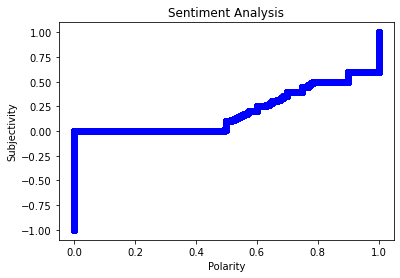

In [11]:
# Plot the polarity and subjectivity
plt.scatter(subj_list, pol_list, color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity') 
plt.show() 